In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")

print(df.head())
print("Shape:", df.shape)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Feature Engineering

df["brand"] = df["CarName"].apply(lambda x: x.split(" ")[0].lower())
print(df["brand"].unique()[:20])

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab']


In [5]:
df["brand"] = df["brand"].replace({
    "maxda": "mazda",
    "porcshce": "porsche",
})

In [6]:
# Data Cleaning

df = df.drop(["car_ID", "CarName"], axis=1)
df = pd.get_dummies(df, drop_first=True)

X = df.drop("price", axis=1)
y = df["price"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (205, 67)
y shape: (205,)


In [7]:
 # T/T Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (164, 67) (164,)
Test shape: (41, 67) (41,)


In [8]:
# T/P

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))

Train RMSE: 1221.6736816495256
Test RMSE: 2667.530221045662
Train R^2: 0.9749741665718862
Test R^2: 0.9098637566100272


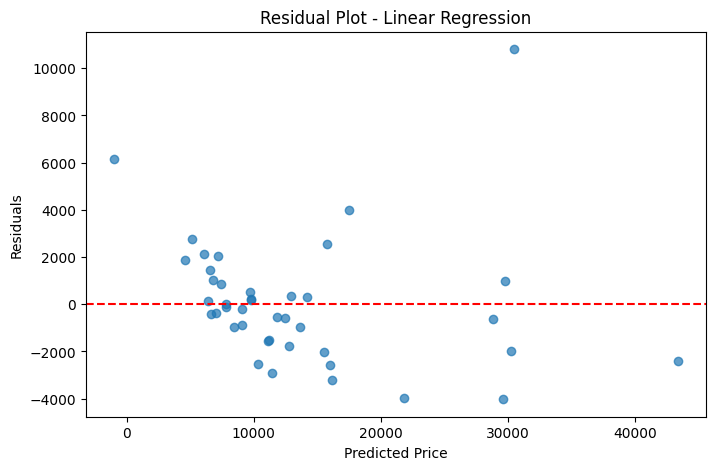

In [9]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

In [10]:
import numpy as np

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
})

coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print(coef_df.head(3))  # top 3 features

                  Feature  Coefficient
23    enginelocation_rear  8088.520354
34  cylindernumber_twelve -7347.523858
24       enginetype_dohcv -6281.722064


In [11]:
# Trying Diff Models

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Test R^2:", r2_score(y_test, y_pred_ridge))
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Test R^2: 0.8762891748284545
Ridge Test RMSE: 3125.096792962126


In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Test R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Test R^2: 0.8885976570163885
Lasso Test RMSE: 2965.5604681983828


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Test R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Test R^2: 0.958396995107365
Random Forest Test RMSE: 1812.266119227715


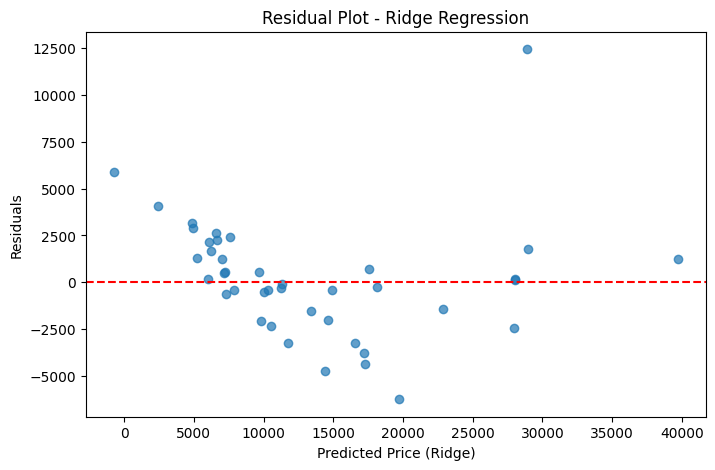

In [14]:
# Residuals for Ridge
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(8,5))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price (Ridge)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Ridge Regression")
plt.show()

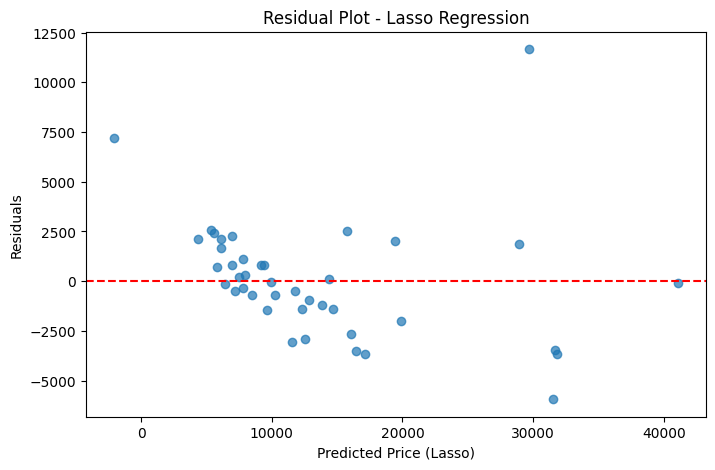

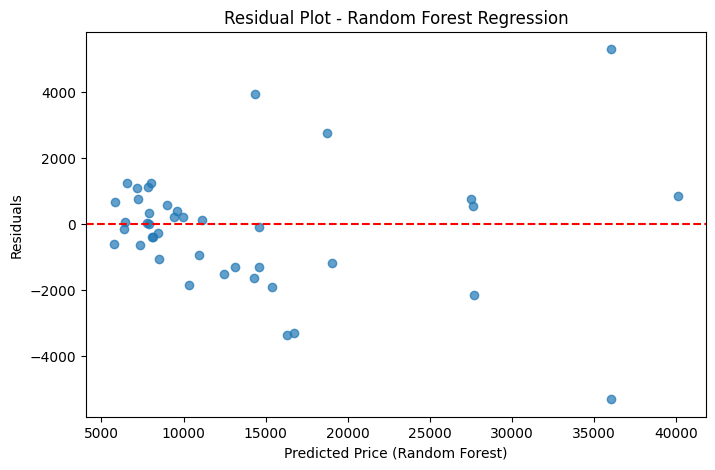

In [16]:
# Residuals for Lasso
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price (Lasso)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Lasso Regression")
plt.show()

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price (Random Forest)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest Regression")
plt.show()